# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
# creating a correlation matrix for fun
corr_matrix=data.corr()
# sorting and viewing what relates to spam
spam_corr = corr_matrix['spam'].sort_values(ascending=False)
# viewing top 5 correlated values and excluding spam which is obviously 1:1.
spam_corr[1:6]


word_freq_your      0.383234
word_freq_000       0.334787
word_freq_remove    0.332117
char_freq_$         0.323629
word_freq_you       0.273651
Name: spam, dtype: float64

<Axes: title={'center': 'word freq your v spam'}, xlabel='word_freq_your', ylabel='spam'>

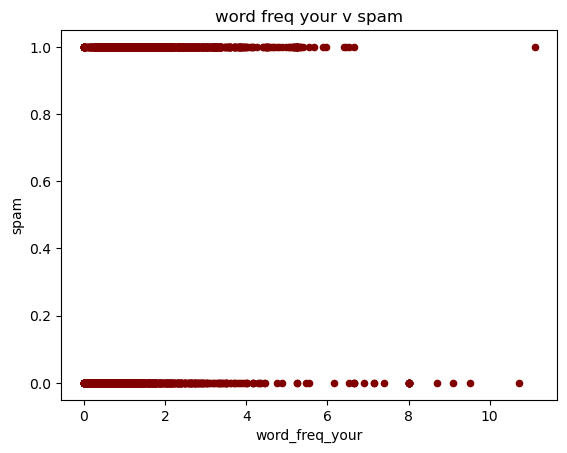

In [8]:
# Plotting the most correlated thing for fun
data.plot.scatter(
    title="word freq your v spam",
    x="word_freq_your",
    y="spam",
    color="maroon"
)

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

Based on the analysis of my correlation (no strong obvious correlation) and the spam identifyer being binary, probably forest. I don't know if having spam as a part of the data means we're telling the ai the answer in this scenario.

## Split the Data into Training and Testing Sets

In [9]:
# Create the labels set `y` and features DataFrame `X`
y=data["spam"]
X=data.drop("spam",axis=1)

In [10]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [11]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [12]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fit the Standard Scaler with the training data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.01918013, -0.07882842,  0.88238558, ..., -0.03149714,
         0.35336439,  0.89545762],
       [-0.33458261, -0.16374896, -0.55043351, ..., -0.12360274,
        -0.38456448, -0.46012913],
       [ 0.67470534, -0.16374896,  0.70573665, ..., -0.04505446,
         0.11820025,  0.06240615],
       ...,
       [ 0.20160161, -0.01938404,  0.84313026, ...,  0.00153942,
         0.11820025,  0.5315193 ],
       [-0.33458261, -0.16374896, -0.55043351, ..., -0.11644832,
        -0.34401894, -0.33825988],
       [-0.33458261, -0.16374896, -0.55043351, ..., -0.10857245,
        -0.36023715, -0.45345136]])

In [14]:
# Scale the training data
X_train_scaled=scaler.transform(X_train)

In [15]:
# Scale testing
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled=scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [16]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
lrm=LogisticRegression(random_state=1)
lrm_model=lrm.fit(X_train_scaled,y_train)

In [17]:
# Make and save testing predictions with the saved logistic regression model using the test data
predictions= lrm_model.predict(X_test_scaled)
# Review the predictions
predictions[:10]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [20]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
l=accuracy_score(y_test, predictions)
print(f"Log Reg Accuracy Score: {l}")

Log Reg Accuracy Score: 0.9313640312771503


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [22]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=69, random_state=1)
forest

RandomForestClassifier(n_estimators=69, random_state=1)

In [23]:
# Make and save testing predictions with the saved logistic regression model using the test data
forest_model=forest.fit(X_train_scaled,y_train)
predictions_f=forest_model.predict(X_test_scaled)
# Review the predictions
predictions_f[:10]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [27]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
fr=accuracy_score(y_test, predictions_f)
print(f"Rand Forest Accuracy Score: {fr}")

Rand Forest Accuracy Score: 0.9496090356211989


In [28]:
print(f"LRM accuracy: {l:,.5f}  Forest accuracy: {fr:,.5f}")

LRM accuracy: 0.93136  Forest accuracy: 0.94961


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

The forest model shows an accuracy score of .94 while the logistic regression model is .93, therefore it appears that the forest model preformed better. However both values are so close that either would probably be suitable.

In [30]:
# reviewing if the models are overfit
# Predict on training and test data
y_train_pred = lrm_model.predict(X_train_scaled)
y_test_pred =lrm_model.predict(X_test_scaled)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.923768115942029
Test Accuracy: 0.9313640312771503


In [31]:
#repeating for forest
y_train_pred = forest_model.predict(X_train_scaled)
y_test_pred =forest_model.predict(X_test_scaled)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.998840579710145
Test Accuracy: 0.9496090356211989


Data does not appear to be overfit for either model.